# Analyzing Exchange Rates from 1999 to 2020

Source = [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020) - Downloaded at April 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
import datetime as dt

## Importing dataset and initial examinations

In [2]:
exchange_rates = pd.read_csv("euro-daily-hist_1999_2022.csv")

In [3]:
exchange_rates.info()
exchange_rates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6022 non-null   object 
 1   [Australian dollar ]      6022 non-null   object 
 2   [Bulgarian lev ]          5620 non-null   object 
 3   [Brazilian real ]         5754 non-null   object 
 4   [Canadian dollar ]        6022 non-null   object 
 5   [Swiss franc ]            6022 non-null   object 
 6   [Chinese yuan renminbi ]  5754 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6022 non-null   object 
 9   [Danish krone ]           6022 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6022 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6022 non-null   object 
 14  [Croatia

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-04-08,1.4552,1.9558,5.1583,1.3675,1.0155,6.9115,NaN,24.479,7.4372,...,4.9425,NaN,10.2768,1.4801,NaN,NaN,36.4880,16.0237,1.0861,15.9968
1,2022-04-07,1.4578,1.9558,5.1460,1.3704,1.0185,6.9448,NaN,24.512,7.4378,...,4.9419,NaN,10.3130,1.4848,NaN,NaN,36.5410,16.0929,1.0916,16.0520
2,2022-04-06,1.4431,1.9558,5.0996,1.3647,1.0187,6.9498,NaN,24.441,7.4378,...,4.9433,NaN,10.2855,1.4844,NaN,NaN,36.7010,16.0998,1.0923,15.9934
3,2022-04-05,1.4374,1.9558,5.0384,1.3647,1.0141,6.9783,NaN,24.338,7.4378,...,4.9438,NaN,10.2593,1.4867,NaN,NaN,36.6970,16.1500,1.0969,15.9529
4,2022-04-04,1.4651,1.9558,5.1162,1.3749,1.0203,7.0026,NaN,24.320,7.4385,...,4.9432,NaN,10.3849,1.4938,NaN,NaN,36.8940,16.1830,1.1005,16.0957


1. It looks like a lot of currencies have null values. We have 5699 rows in datatset, each represent a day. We have 40 currencies and nearly half of them lack for some days.
2. Most of columns have datatype : object. Since we are going to analyze them numerically it is better to convert them to floats.

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar','Period\\Unit:': "Day"},inplace=True)
exchange_rates["Day"] = pd.to_datetime(exchange_rates["Day"])
exchange_rates.sort_values(by="Day",ascending=False)
exchange_rates.reset_index(drop=True, inplace = True)

In [5]:
exchange_rates.shape

(6022, 41)

In [6]:
euro_to_dollar = exchange_rates.copy()[["Day","US_dollar"]]

In [7]:
euro_to_dollar["US_dollar"].value_counts()

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.4549     1
1.4643     1
1.4539     1
1.4537     1
1.1659     1
Name: US_dollar, Length: 3595, dtype: int64

We see that "-" appears 62 times as a value for EUR/USD. We are going to drop the values.

In [8]:
euro_to_dollar = euro_to_dollar[~(euro_to_dollar["US_dollar"] == "-")]

In [9]:
euro_to_dollar["US_dollar"] = euro_to_dollar["US_dollar"].astype("float64")

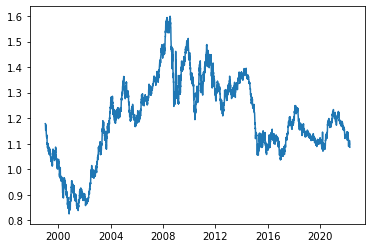

In [10]:
plt.plot(euro_to_dollar["Day"], euro_to_dollar["US_dollar"])
plt.show()

In [11]:
euro_to_dollar["rolling_mean"] = euro_to_dollar["US_dollar"].rolling(30).mean()

<AxesSubplot:xlabel='Day'>

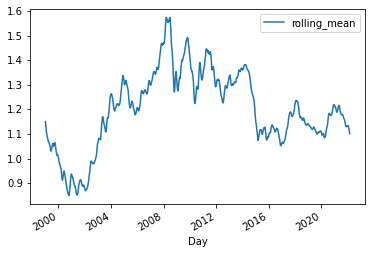

In [12]:
euro_to_dollar.plot.line(x="Day",y="rolling_mean")

In [13]:
eur_tl = exchange_rates.copy()[["Day","[Turkish lira ]"]]
eur_tl.rename(columns={"[Turkish lira ]" : "TL"},inplace=True)
eur_tl.sort_values(by="Day",inplace=True,ascending=True)
eur_tl.reset_index(inplace=True)

<AxesSubplot:xlabel='Day'>

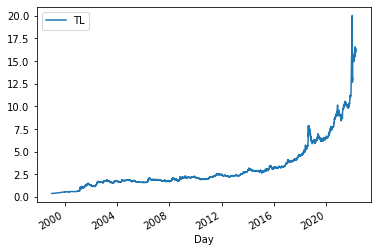

In [14]:
eur_tl.plot.line(x="Day",y="TL")

In [15]:
eur_tl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   6022 non-null   int64         
 1   Day     6022 non-null   datetime64[ns]
 2   TL      5960 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 141.3 KB


It looks like we have 62 null values in value columns. Dropping null values

In [16]:
eur_tl.dropna(inplace=True)
eur_tl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 6021
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   5960 non-null   int64         
 1   Day     5960 non-null   datetime64[ns]
 2   TL      5960 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 186.2 KB


<AxesSubplot:xlabel='Day'>

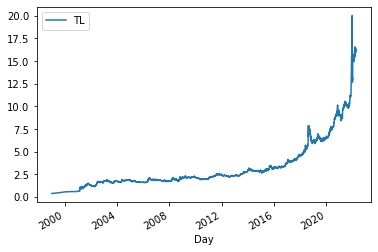

In [17]:
eur_tl.plot.line(x="Day",y="TL")

In [18]:
eur_tl.head()

,index,Day,TL
0,6021,1999-01-04,0.3723
1,6020,1999-01-05,0.3728
2,6019,1999-01-06,0.3722
3,6018,1999-01-07,0.3701
4,6017,1999-01-08,0.3718


1. Ahmet Necdet Sezer : 16 May 2000 - 28 August 2007
2. Abdullah Gül : 28 August 2007 - 28 August 2014
3. Recep Tayyip Erdoğan : 28 August 2014 - Today

In [19]:
dateindex = eur_tl.copy().set_index("Day")
dateindex.drop("index",axis=1,inplace=True)

In [20]:
dateindex.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5960 entries, 1999-01-04 to 2022-04-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TL      5960 non-null   float64
dtypes: float64(1)
memory usage: 93.1 KB


In [21]:
sezer = dateindex.copy().loc["2000-5-16":"2007-8-28"]
gul = dateindex.copy().loc["2007-8-28":"2014-8-28"]
erdogan = dateindex.copy().loc["2014-8-28":]

for i in [sezer,gul,erdogan]:
    i["rolling"] = i["TL"].rolling(30).mean()

## Plotting the Figue

Below we create two seperate figures bu use first row of first figure and second row of second figure.

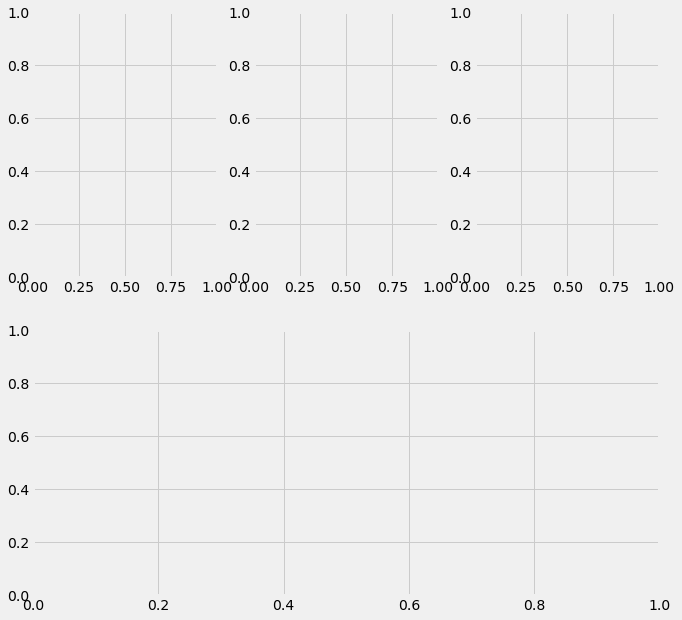

In [110]:
style.use("fivethirtyeight")

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(212)

Arranging the subfigures

In [111]:
for ax in [ax1,ax2,ax3,ax4]:
    ax.set_yticks([4,8,12,16,20])
    ax.set_yticklabels(["4","8","12","16","20"],
                      alpha=0.3)
    ax.set_ylim(0,17)
    ax.grid(alpha=0.5)

In [112]:
##Ax 1 : Sezer
ax1.plot(sezer.index,sezer["rolling"],  color='#BF5FFF')
ax1.set_xticks(["2000","2002","2004","2006","2008"])
ax1.set_xticklabels(["2000","2002","2004","2006","2008"], alpha = 0.3)

##Ax 2 : Gul
ax2.plot(gul.index,gul["rolling"], color='#ffa500')
ax2.set_xticks(["2008","2010","2012","2014"])
ax2.set_xticklabels(["2008","2010","2012","2014"], alpha = 0.3)

##Ax 3 : Erdogan
ax3.plot(erdogan[:"2018-07-01"].index,erdogan["rolling"][:"2018-07-01"], color='#00B2EE')
ax3.plot(erdogan["2018-07-01":].index,erdogan["rolling"]["2018-07-01":],color="#EE3C00")
ax3.set_xticks(["2014","2016","2018","2020","2022"])
ax3.set_xticklabels(["2014","2016","2018","2020","2022"], alpha = 0.3)

##Ax 4 : Together
ax4.plot(sezer.index,sezer["rolling"],  color='#BF5FFF')
ax4.plot(gul.index,gul["rolling"], color='#ffa500')
ax4.plot(erdogan[:"2018-07-01"].index,erdogan["rolling"][:"2018-07-01"], color='#00B2EE')
ax4.plot(erdogan["2018-07-01":].index,erdogan["rolling"]["2018-07-01":],color="#EE3C00")

ax1.text(10000,21,"EURO-TL rate incresed rapidly under the last president of Turkey",size=20,weight="bold")
ax1.text(10000,19,"""EURO-TL exchange rates under Ahmet Necdet Sezer (2000-2007), Abdullah Gul (2007-2014) and Recep 
Tayyip Erdogan (2014-2018 Ceremonial President, 2018-Today Executive President)""")

Text(10000, 19, 'EURO-TL exchange rates under Ahmet Necdet Sezer (2000-2007), Abdullah Gul (2007-2014) and Recep \nTayyip Erdogan (2014-2018 Ceremonial President, 2018-Today Executive President)')

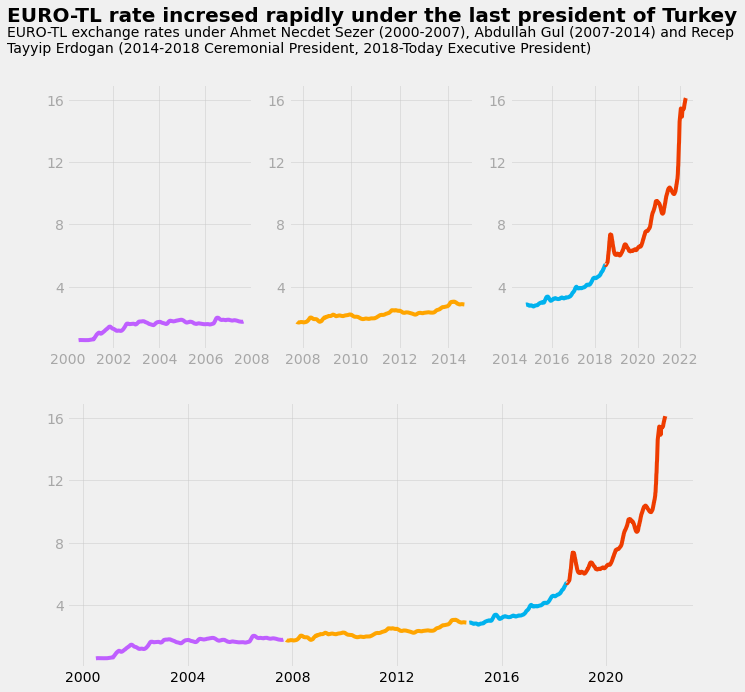

In [113]:
fig